In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('dataset/Canada.xlsx', 
                       sheet_name='Canada by Citizenship', 
                       skiprows=range(20), 
                       skipfooter=2)

In [3]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent','RegName':'Region'}, inplace=True)

df_can['Total'] = df_can.sum(axis=1)

df_can.set_index('Country', inplace=True)

df_can.columns=list(map(str,df_can.columns))

years = list(map(str, range(1980,2014)))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.style.use(['ggplot'])

### WORD CLOUDS

In [5]:
!conda install -c conda-forge wordcloud --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/firdausnutrihadi/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h5406a74_1         170 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py38h5406a74_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38hecd8cb5_0 --> conda-forge::conda

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
alice_novel = open('dataset/alice_novel.txt','r').read()

In [8]:
alice_novel

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [9]:
#setting untuk mengabaikan kata2 umum yang tak punya arti
stopwords = set(STOPWORDS)

In [21]:
#setting hanya 2000 kata awal
alice_wc = WordCloud(background_color='white',
                    max_words=2000,
                    stopwords=stopwords)

In [30]:
#olah isi novel sesuai kebutuhan
alice_wc.generate(alice_novel)

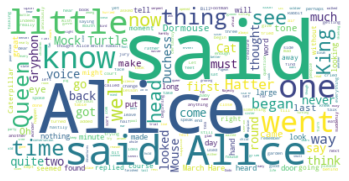

In [34]:
plt.imshow(alice_wc, interpolation='bilinear') #dalam bentuk image ,render gambar ke layar
plt.axis('off') #ilangin grid/sumbu2
plt.show()

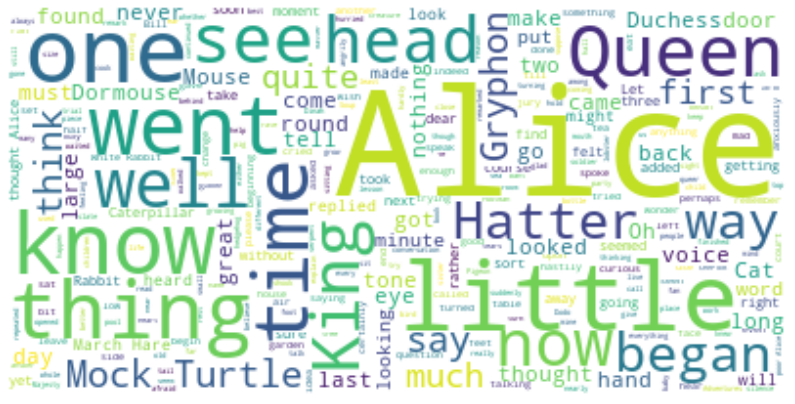

In [38]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear') #dalam bentuk image ,render gambar ke layar
plt.axis('off') #ilangin grid/sumbu2
plt.show()

In [40]:
!pip install seaborn

You should consider upgrading via the '/Users/firdausnutrihadi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [41]:
import seaborn as sns

In [42]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


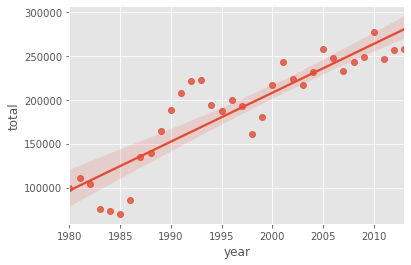

In [44]:
ax = sns.regplot(x='year',y='total',data=df_tot)

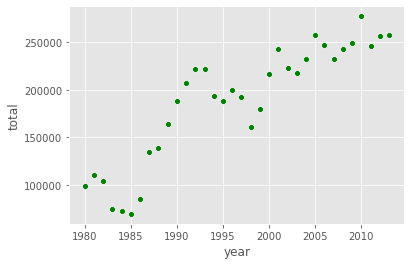

In [47]:
ax = sns.scatterplot(x='year',y='total',data=df_tot, color='green')

### FOLIUM

In [48]:
!pip install folium

     |████████████████████████████████| 94 kB 1.1 MB/s eta 0:00:011
You should consider upgrading via the '/Users/firdausnutrihadi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [49]:
import folium

In [52]:
world_map = folium.Map()

In [53]:
world_map

In [75]:
world_map = folium.Map(location=[-6.8699819,107.5810261], zoom_start=14)

In [76]:
world_map

In [83]:
world_map = folium.Map(location=[-6.8699819,107.5810261], 
                       zoom_start=14,
                      tiles='Stamen Toner'
                      )
world_map

In [84]:
world_map = folium.Map(location=[-6.8699819,107.5810261], 
                       zoom_start=14,
                      tiles='Stamen Terrain'
                      )
world_map